In [20]:
# Stage 0: Initial Setup and Imports

import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Optional: Enables inline plotting in Jupyter Notebook
# (This should be executed in a notebook cell, not in a Python script)
%matplotlib inline


In [21]:
# Set a seed for reproducibility of random numbers
np.random.seed(23)

# Create a 1D array representing sample indices (like a time axis)
ns = np.linspace(0, 200, 1000)

# Define the original source signals (shape: [1000, 3]):
# - 1st source: sinusoidal signal
# - 2nd source: sawtooth wave
# - 3rd source: uniform random noise
S = np.array([
    np.sin(ns * 1),              # Independent source 1
    signal.sawtooth(ns * 1.9),   # Independent source 2
    np.random.random(len(ns))    # Independent source 3 (noise)
]).T  # Transpose to shape: (samples=1000, sources=3)

# Define a 3×3 mixing matrix A (assumed invertible)
A = np.array([
    [0.5, 1, 0.2],
    [1, 0.5, 0.4],
    [0.5, 0.8, 1]
])

# Create the mixed signals (observed data) by applying the mixing matrix
# Resulting X has shape: (mixed_signals=3, samples=1000)
X = S.dot(A).T  # Transpose to align with the ICA convention (each row = 1 sensor's signal)


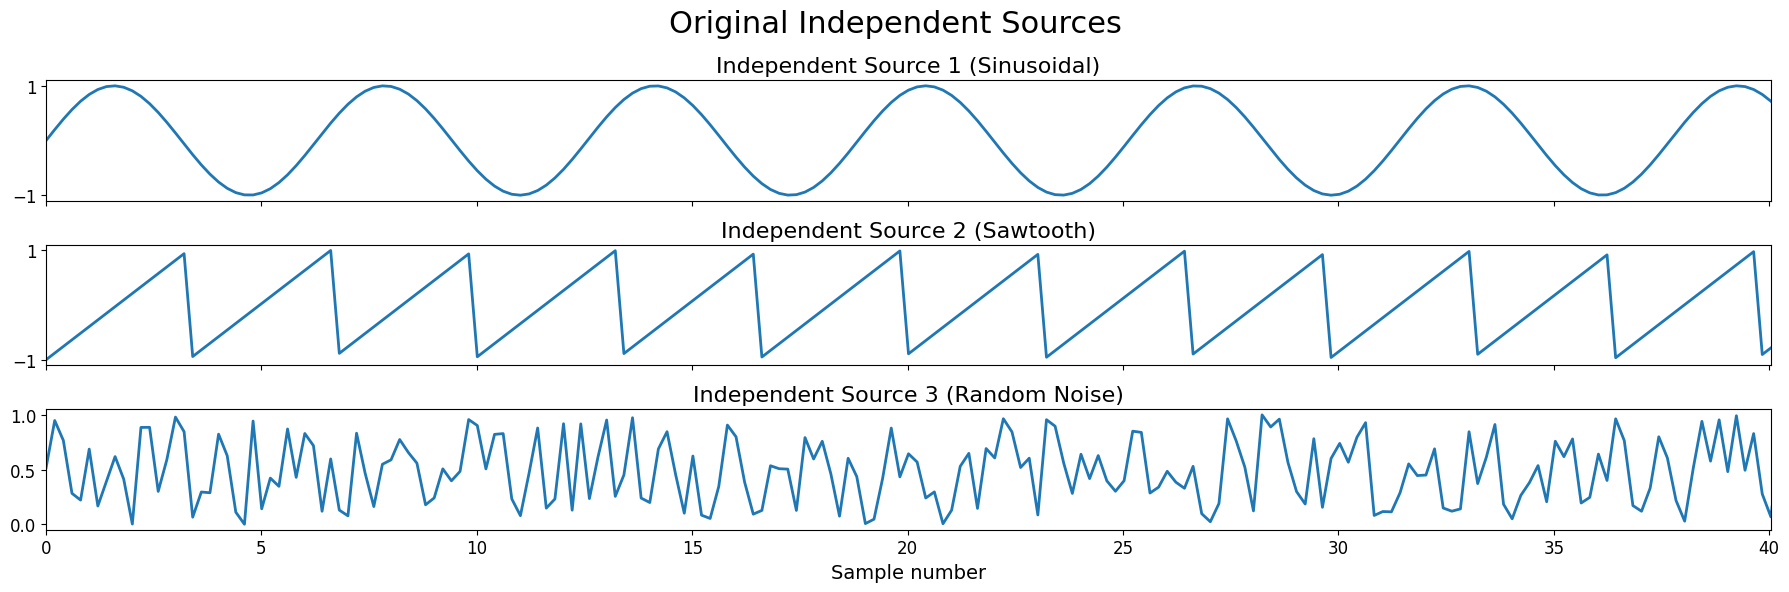

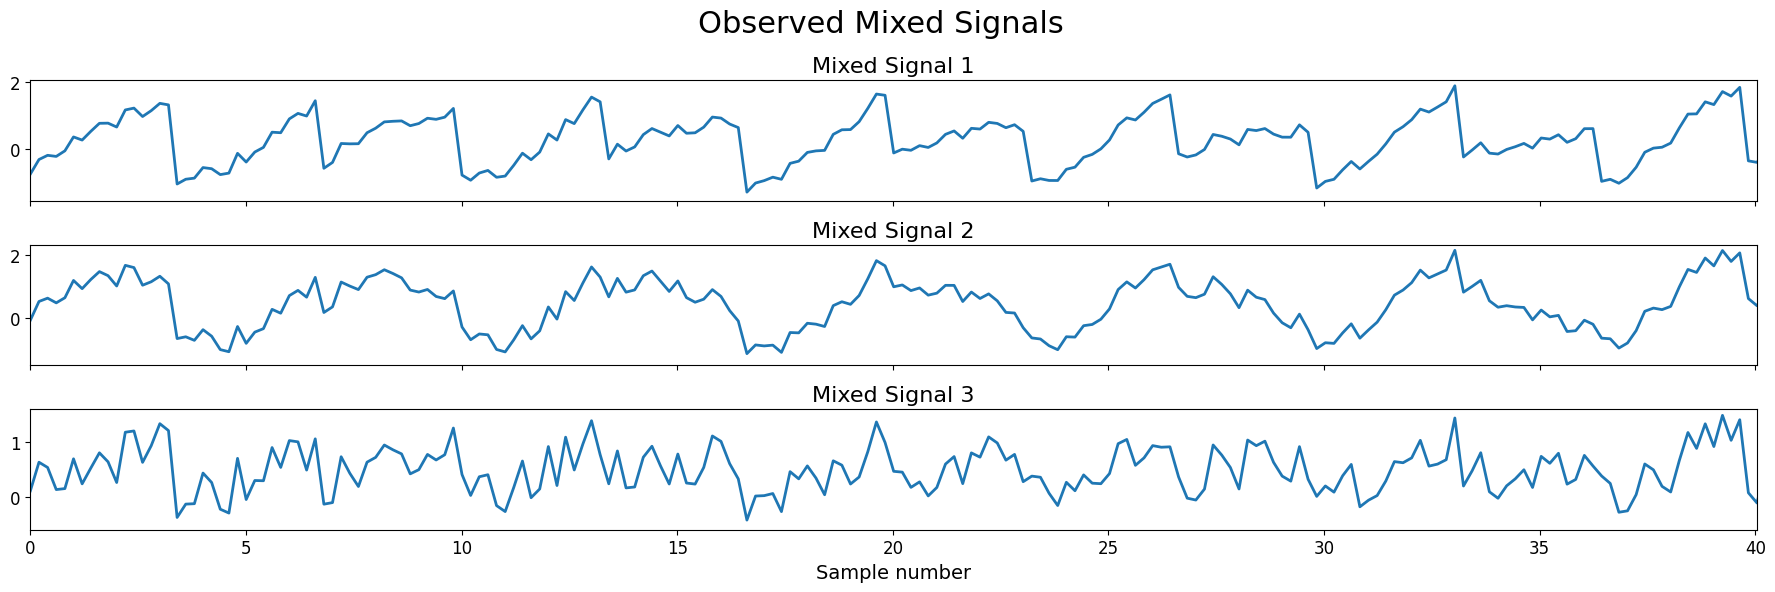

In [22]:
# Stage: Visualizing the Original Independent Sources (S)
fig1, ax1 = plt.subplots(3, 1, figsize=(18, 6), sharex=True)

# Plot each source signal in a separate subplot
ax1[0].plot(ns, S[:, 0], lw=2)
ax1[0].set_title('Independent Source 1 (Sinusoidal)', fontsize=16)
ax1[0].tick_params(labelsize=12)
ax1[0].set_xlim(ns[0], ns[200])
ax1[0].set_yticks([-1, 1])

ax1[1].plot(ns, S[:, 1], lw=2)
ax1[1].set_title('Independent Source 2 (Sawtooth)', fontsize=16)
ax1[1].tick_params(labelsize=12)
ax1[1].set_xlim(ns[0], ns[200])
ax1[1].set_yticks([-1, 1])

ax1[2].plot(ns, S[:, 2], lw=2)
ax1[2].set_title('Independent Source 3 (Random Noise)', fontsize=16)
ax1[2].tick_params(labelsize=12)
ax1[2].set_xlim(ns[0], ns[200])
ax1[2].set_xlabel('Sample number', fontsize=14)

fig1.suptitle('Original Independent Sources', fontsize=22)
plt.tight_layout()
plt.show()

# Stage: Visualizing the Mixed Signals (X = A·S)
fig2, ax2 = plt.subplots(3, 1, figsize=(18, 6), sharex=True)

# Each row of X corresponds to a mixed sensor signal
ax2[0].plot(ns, X[0], lw=2)
ax2[0].set_title('Mixed Signal 1', fontsize=16)
ax2[0].tick_params(labelsize=12)
ax2[0].set_xlim(ns[0], ns[200])

ax2[1].plot(ns, X[1], lw=2)
ax2[1].set_title('Mixed Signal 2', fontsize=16)
ax2[1].tick_params(labelsize=12)
ax2[1].set_xlim(ns[0], ns[200])

ax2[2].plot(ns, X[2], lw=2)
ax2[2].set_title('Mixed Signal 3', fontsize=16)
ax2[2].tick_params(labelsize=12)
ax2[2].set_xlim(ns[0], ns[200])
ax2[2].set_xlabel('Sample number', fontsize=14)

fig2.suptitle('Observed Mixed Signals', fontsize=22)
plt.tight_layout()
plt.show()


In [23]:
# Define two non-Gaussian (uniform) independent components
s1 = np.random.rand(1000)
s2 = np.random.rand(1000)
s = np.array([s1, s2])  # Shape: (2, 1000)

# Define two Gaussian independent components
s1n = np.random.normal(size=1000)
s2n = np.random.normal(size=1000)
sn = np.array([s1n, s2n])  # Shape: (2, 1000)

# Define an orthogonal mixing matrix A (e.g., ~rotation matrix)
A = np.array([
    [0.96, -0.28],
    [0.28,  0.96]
])

# Linearly mix the uniform sources
mixedSignals = s.T.dot(A)     # Shape: (1000, 2)

# Linearly mix the Gaussian sources
mixedSignalsN = sn.T.dot(A)   # Shape: (1000, 2)


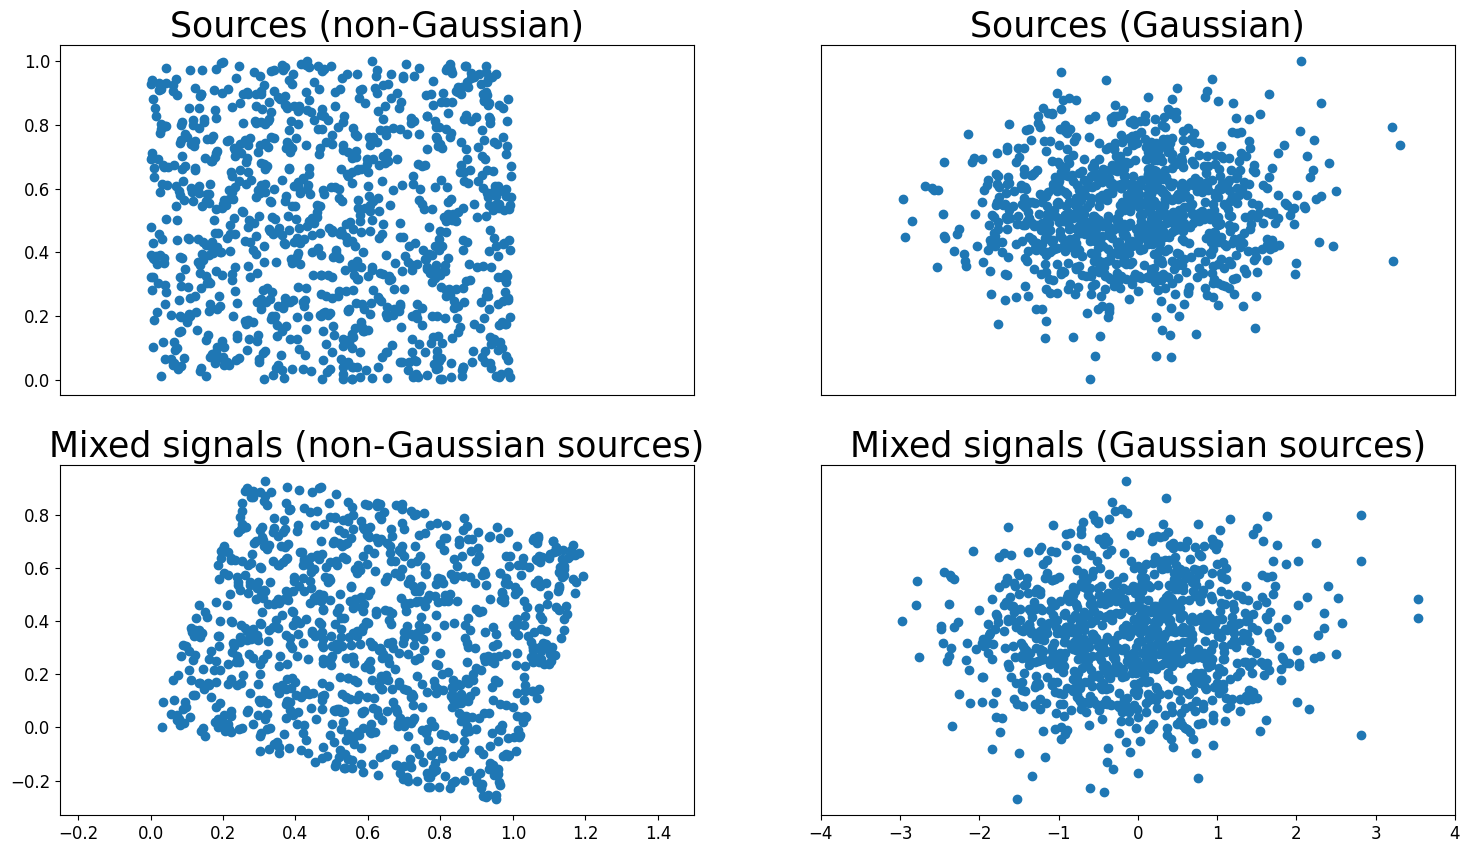

In [24]:
# Create a 2x2 grid of scatter plots comparing sources and their mixtures

fig, ax = plt.subplots(2, 2, figsize=[18, 10])

# Plot 1: Original non-Gaussian sources (uniform)
ax[0][0].scatter(s[0], s[1])
ax[0][0].tick_params(labelsize=12)
ax[0][0].set_title('Sources (non-Gaussian)', fontsize=25)
ax[0][0].set_xlim([-0.25, 1.5])
ax[0][0].set_xticks([])

# Plot 2: Original Gaussian sources
ax[0][1].scatter(sn[0], sn[1])
ax[0][1].tick_params(labelsize=12)
ax[0][1].set_title('Sources (Gaussian)', fontsize=25)
ax[0][1].set_xlim([-4, 4])
ax[0][1].set_xticks([])
ax[0][1].set_yticks([])

# Plot 3: Mixed non-Gaussian signals
ax[1][0].scatter(mixedSignals.T[0], mixedSignals.T[1])
ax[1][0].tick_params(labelsize=12)
ax[1][0].set_title('Mixed signals (non-Gaussian sources)', fontsize=25)
ax[1][0].set_xlim([-0.25, 1.5])

# Plot 4: Mixed Gaussian signals
ax[1][1].scatter(mixedSignalsN.T[0], mixedSignalsN.T[1])
ax[1][1].tick_params(labelsize=12)
ax[1][1].set_title('Mixed signals (Gaussian sources)', fontsize=25)
ax[1][1].set_xlim([-4, 4])
ax[1][1].set_yticks([])

# Show the complete figure
plt.show()


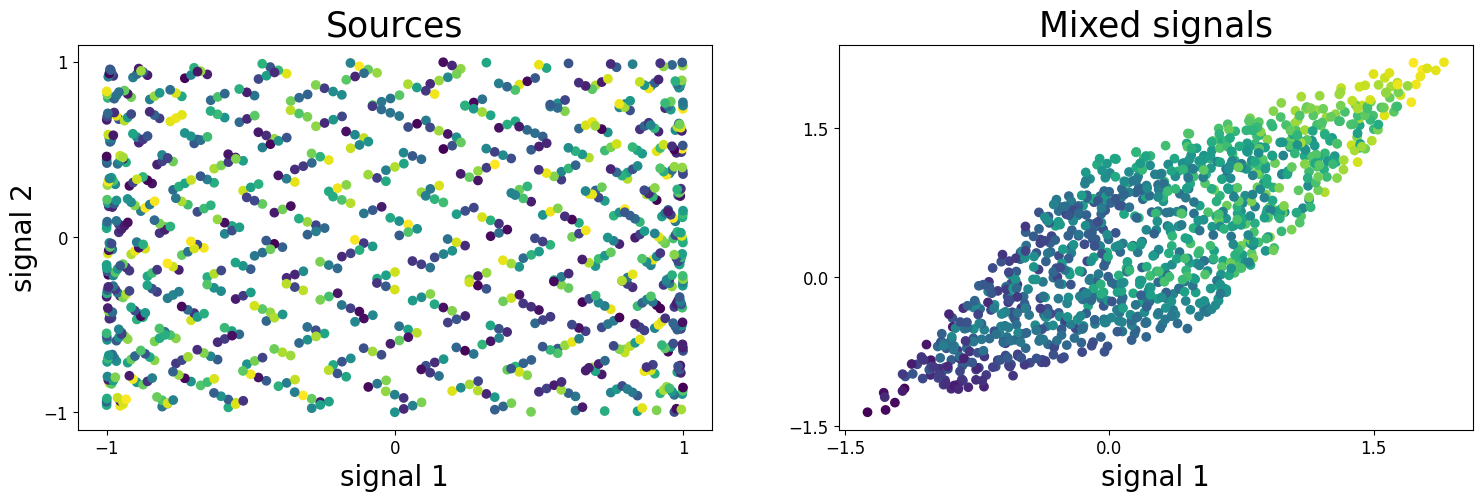

In [25]:
# Create side-by-side scatter plots to compare sources and their mixed signals

fig, ax = plt.subplots(1, 2, figsize=[18, 5])

# Left: Scatter plot of original sources, colored by third signal
ax[0].scatter(S.T[0], S.T[1], c=S.T[2])  # Use source 3 as color
ax[0].tick_params(labelsize=12)
ax[0].set_yticks([-1, 0, 1])
ax[0].set_xticks([-1, 0, 1])
ax[0].set_xlabel('signal 1', fontsize=20)
ax[0].set_ylabel('signal 2', fontsize=20)
ax[0].set_title('Sources', fontsize=25)

# Right: Scatter plot of mixed signals, colored by third mixed component
ax[1].scatter(X[0], X[1], c=X[2])  # Use third mixed signal as color
ax[1].tick_params(labelsize=12)
ax[1].set_yticks([-1.5, 0, 1.5])
ax[1].set_xticks([-1.5, 0, 1.5])
ax[1].set_xlabel('signal 1', fontsize=20)
ax[1].set_title('Mixed signals', fontsize=25)

# Display the plots
plt.show()


In [26]:
def center(x):
    """
    Center the data by subtracting the mean along each row (sensor).

    Parameters:
        x (ndarray): Mixed signal matrix of shape (n_channels, n_samples)

    Returns:
        centered (ndarray): Mean-centered signal matrix
        mean (ndarray): Mean vector (n_channels x 1) for later reconstruction
    """
    mean = np.mean(x, axis=1, keepdims=True)  # Compute mean for each row (channel)
    centered = x - mean                       # Subtract mean from each signal
    return centered, mean


In [27]:
def covariance(x):
    """
    Compute the covariance matrix of a zero-mean data matrix.

    Parameters:
        x (ndarray): Signal matrix of shape (n_channels, n_samples)

    Returns:
        cov (ndarray): Covariance matrix (n_channels x n_channels)
    """
    mean = np.mean(x, axis=1, keepdims=True)  # Compute mean per row
    n = x.shape[1] - 1                         # Use n-1 for unbiased estimate
    m = x - mean                               # Center the data
    return (m @ m.T) / n                       # Covariance = (X Xᵀ) / (n - 1)


In [28]:
def whiten(x):
    """
    Whiten the data by removing second-order correlations
    and normalizing variance using PCA.

    Parameters:
        x (ndarray): Centered signal matrix (n_channels, n_samples)

    Returns:
        Xw (ndarray): Whitened signal matrix
        whiteM (ndarray): Whitening matrix used to transform data
    """
    # Step 1: Compute covariance matrix of input data
    coVarM = covariance(x)  # shape: (n_channels, n_channels)

    # Step 2: Perform SVD decomposition (equivalent to eigen decomposition for symmetric matrices)
    U, S, V = np.linalg.svd(coVarM)  # U = eigenvectors, S = eigenvalues

    # Step 3: Build diagonal matrix with inverse square roots of eigenvalues
    d = np.diag(1.0 / np.sqrt(S))  # Whitening factor

    # Step 4: Construct whitening matrix: W_white = U * D^{-1/2} * Uᵀ
    whiteM = U @ d @ U.T

    # Step 5: Apply whitening matrix to data
    Xw = whiteM @ x  # Whitened signals

    return Xw, whiteM


In [29]:
def fastIca(signals, alpha=1, thresh=1e-8, iterations=5000):
    """
    Perform Independent Component Analysis (ICA) using the FastICA algorithm.

    Parameters:
        signals (ndarray): Whitened input data of shape (n_channels, n_samples)
        alpha (float): Nonlinearity parameter (used in contrast function tanh)
        thresh (float): Convergence threshold
        iterations (int): Maximum number of iterations for convergence per component

    Returns:
        W (ndarray): Estimated unmixing matrix (n_channels x n_channels)
    """
    m, n = signals.shape  # m: number of components, n: number of samples

    # Step 1: Initialize random unmixing matrix W (shape: m x m)
    W = np.random.rand(m, m)

    # Step 2: Estimate each independent component one-by-one
    for c in range(m):
        # Initialize weight vector for component c
        w = W[c, :].copy().reshape(m, 1)
        w = w / np.linalg.norm(w)  # Normalize to unit vector

        i = 0
        lim = 100  # initialize with dummy value to enter loop

        # FastICA fixed-point iteration
        while lim > thresh and i < iterations:
            # Project data: wᵀ * X
            ws = np.dot(w.T, signals)

            # Apply contrast function g(u) = tanh(αu)
            wg = np.tanh(alpha * ws).T

            # Derivative of g(u): g'(u) = α(1 - tanh²(αu))
            wg_ = (1 - np.square(np.tanh(ws))) * alpha

            # Update rule for FastICA
            w_new = (signals * wg.T).mean(axis=1) - wg_.mean() * w.squeeze()

            # Decorrelate against previously found components (Gram-Schmidt)
            w_new -= np.dot(np.dot(w_new, W[:c].T), W[:c])

            # Normalize new weight vector
            w_new /= np.linalg.norm(w_new)

            # Check convergence: angle between w and w_new
            lim = np.abs(np.abs(np.dot(w_new, w.squeeze())) - 1)

            # Update for next iteration
            w = w_new.reshape(m, 1)
            i += 1

        # Store converged weight vector
        W[c, :] = w.T

    return W


In [30]:
# Step 1: Remove the mean (center each signal to have zero mean)
Xc, meanX = center(X)

# Step 2: Whiten the centered signals to remove second-order correlations
Xw, whiteM = whiten(Xc)


In [31]:
# Check if covariance of whitened matrix is approximately the identity matrix
print(np.round(covariance(Xw)))


[[ 1. -0. -0.]
 [-0.  1. -0.]
 [-0. -0.  1.]]


In [32]:
# Step 1: Estimate the unmixing matrix W using FastICA
W = fastIca(Xw, alpha=1)

# Step 2: Apply W to whitened data to recover estimated sources
unMixed = Xw.T @ W.T  # Shape: (samples, components)

# Step 3: (Optional) Add back original mean if needed
# Here, meanX was originally shape: (3, 1), so we subtract it row-wise
unMixed = (unMixed.T - meanX).T  # Shape: (components, samples)


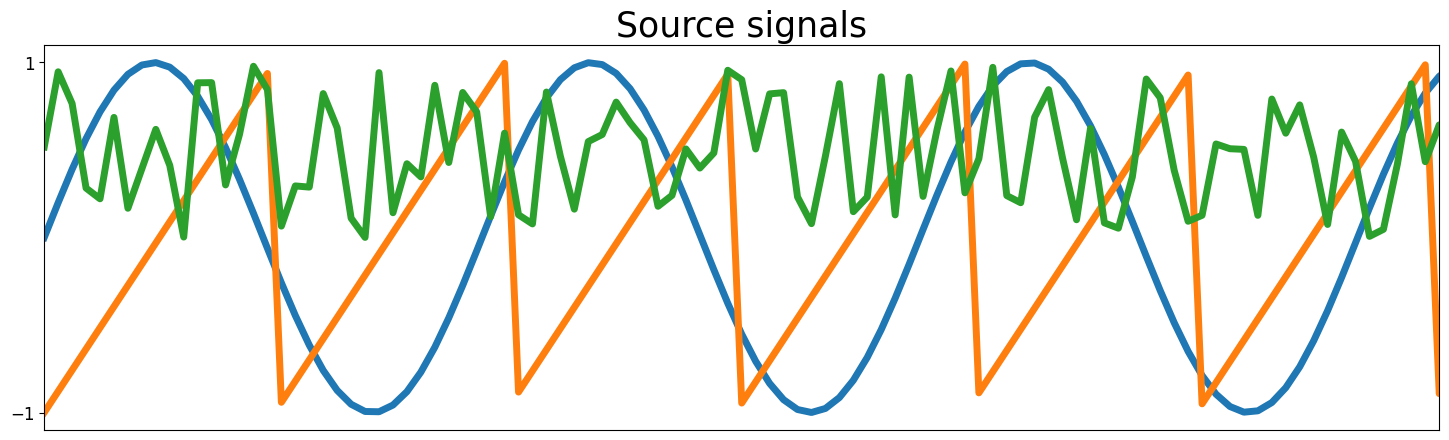

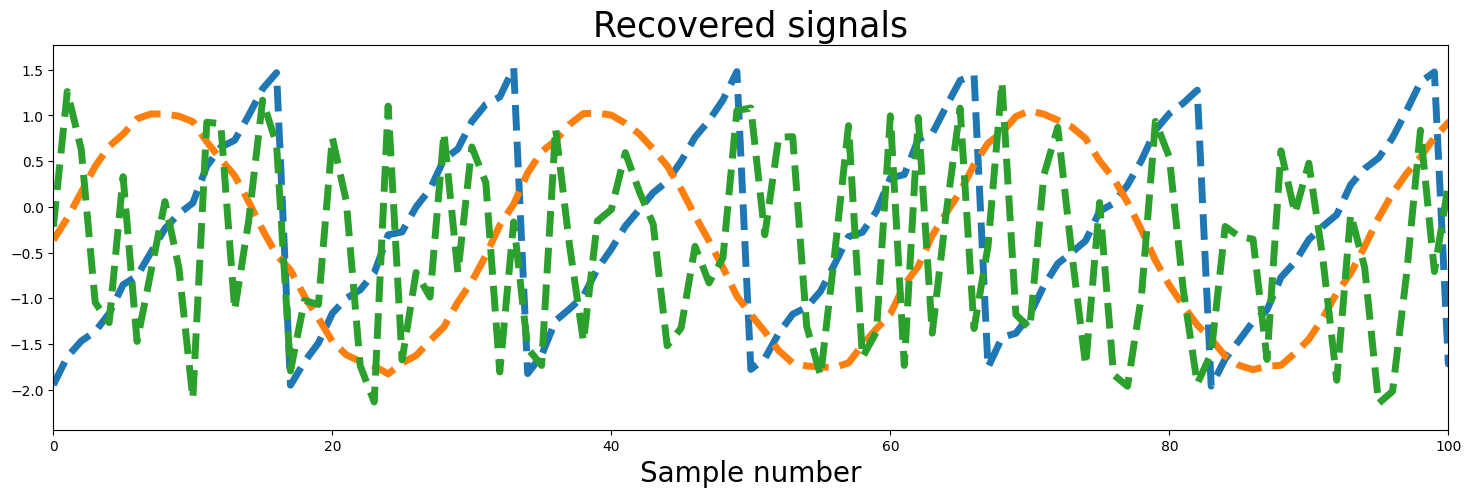

In [33]:
# Plot original source signals (ground truth)
fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot(S, lw=5)  # Plot all original sources
ax.tick_params(labelsize=12)
ax.set_xticks([])
ax.set_yticks([-1, 1])
ax.set_title('Source signals', fontsize=25)
ax.set_xlim(0, 100)  # Zoom into first 100 samples

# Plot ICA-recovered signals (estimated independent components)
fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot(unMixed, '--', label='Recovered signals', lw=5)  # Dotted lines for recovered signals
ax.set_xlabel('Sample number', fontsize=20)
ax.set_title('Recovered signals', fontsize=25)
ax.set_xlim(0, 100)  # Same zoom range for fair comparison

plt.show()


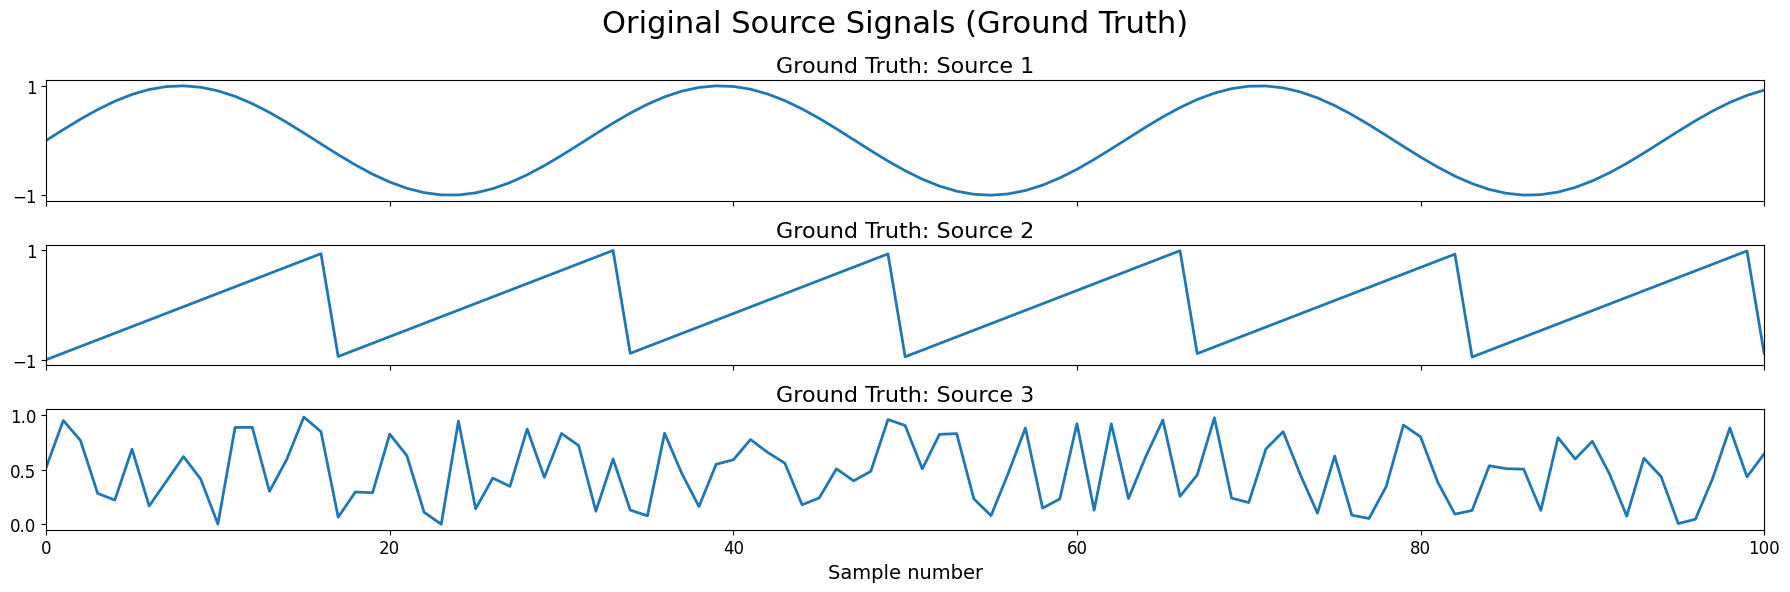

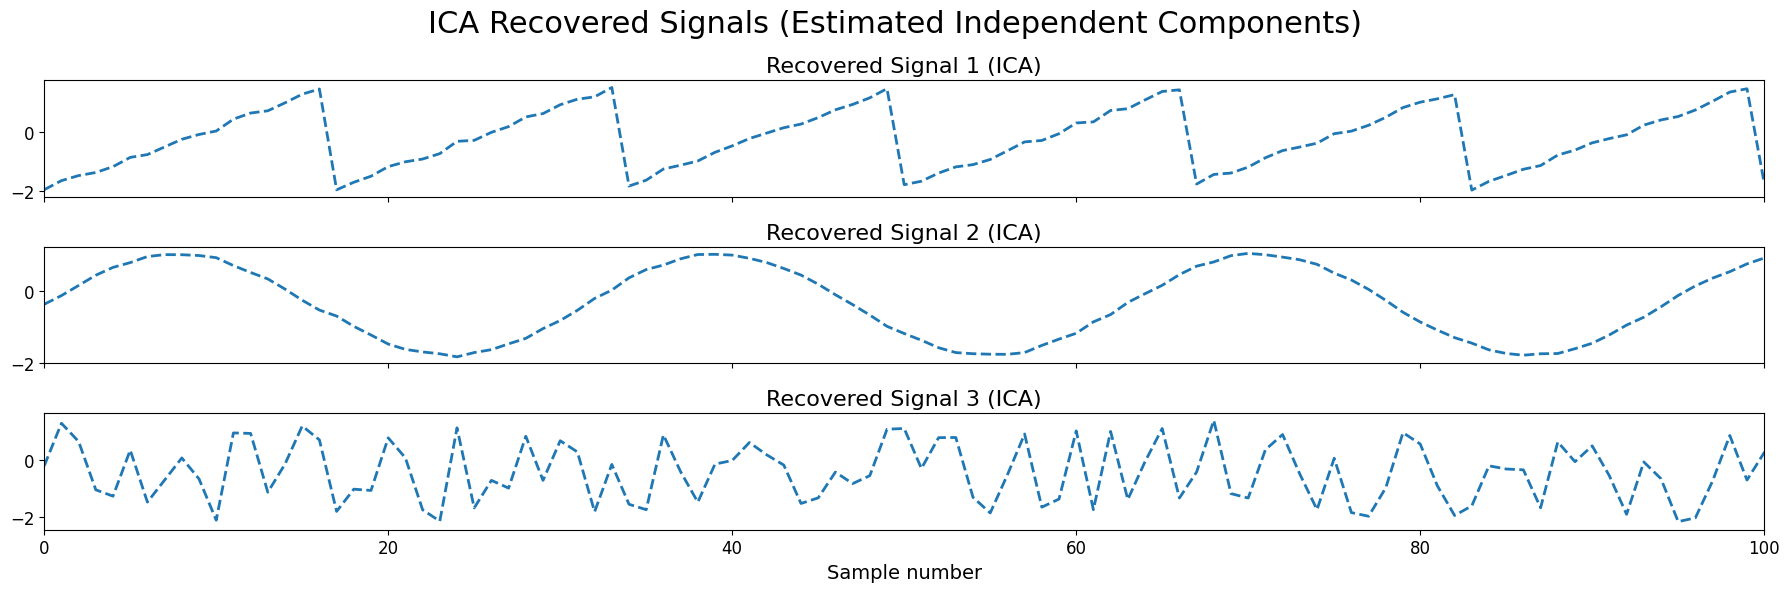

In [34]:
# Stage: Plot Original Source Signals (Ground Truth)
fig_orig, ax_orig = plt.subplots(3, 1, figsize=(18, 6), sharex=True)

# Plot each original source in its own subplot
ax_orig[0].plot(S[:, 0], lw=2)
ax_orig[0].set_title('Ground Truth: Source 1', fontsize=16)
ax_orig[0].tick_params(labelsize=12)
ax_orig[0].set_xlim(0, 100)
ax_orig[0].set_yticks([-1, 1])

ax_orig[1].plot(S[:, 1], lw=2)
ax_orig[1].set_title('Ground Truth: Source 2', fontsize=16)
ax_orig[1].tick_params(labelsize=12)
ax_orig[1].set_xlim(0, 100)
ax_orig[1].set_yticks([-1, 1])

ax_orig[2].plot(S[:, 2], lw=2)
ax_orig[2].set_title('Ground Truth: Source 3', fontsize=16)
ax_orig[2].tick_params(labelsize=12)
ax_orig[2].set_xlim(0, 100)
ax_orig[2].set_xlabel('Sample number', fontsize=14)

fig_orig.suptitle('Original Source Signals (Ground Truth)', fontsize=22)
plt.tight_layout()
plt.show()

# Stage: Plot Recovered Signals (Unmixed ICA Components)
fig_rec, ax_rec = plt.subplots(3, 1, figsize=(18, 6), sharex=True)

# Plot each recovered signal separately (unMixed: shape = [3, 1000] or [1000, 3])
# If shape is [3, 1000], transpose to [1000, 3] first
if unMixed.shape[0] == 3:
    unMixed = unMixed.T

# Plot each recovered signal in a separate subplot
ax_rec[0].plot(unMixed[:, 0], '--', lw=2)
ax_rec[0].set_title('Recovered Signal 1 (ICA)', fontsize=16)
ax_rec[0].tick_params(labelsize=12)
ax_rec[0].set_xlim(0, 100)

ax_rec[1].plot(unMixed[:, 1], '--', lw=2)
ax_rec[1].set_title('Recovered Signal 2 (ICA)', fontsize=16)
ax_rec[1].tick_params(labelsize=12)
ax_rec[1].set_xlim(0, 100)

ax_rec[2].plot(unMixed[:, 2], '--', lw=2)
ax_rec[2].set_title('Recovered Signal 3 (ICA)', fontsize=16)
ax_rec[2].tick_params(labelsize=12)
ax_rec[2].set_xlim(0, 100)
ax_rec[2].set_xlabel('Sample number', fontsize=14)

fig_rec.suptitle('ICA Recovered Signals (Estimated Independent Components)', fontsize=22)
plt.tight_layout()
plt.show()


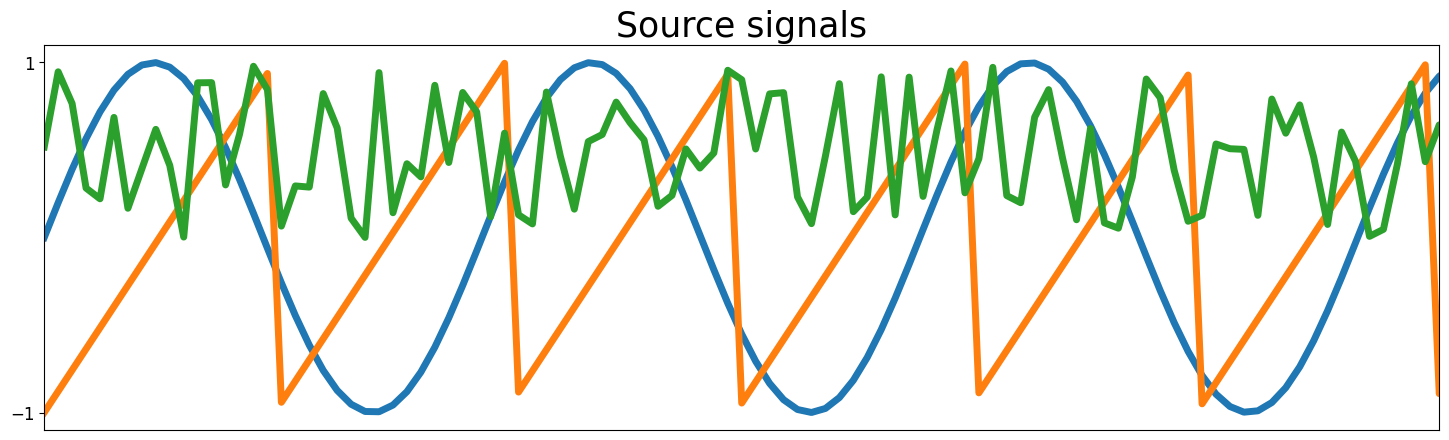

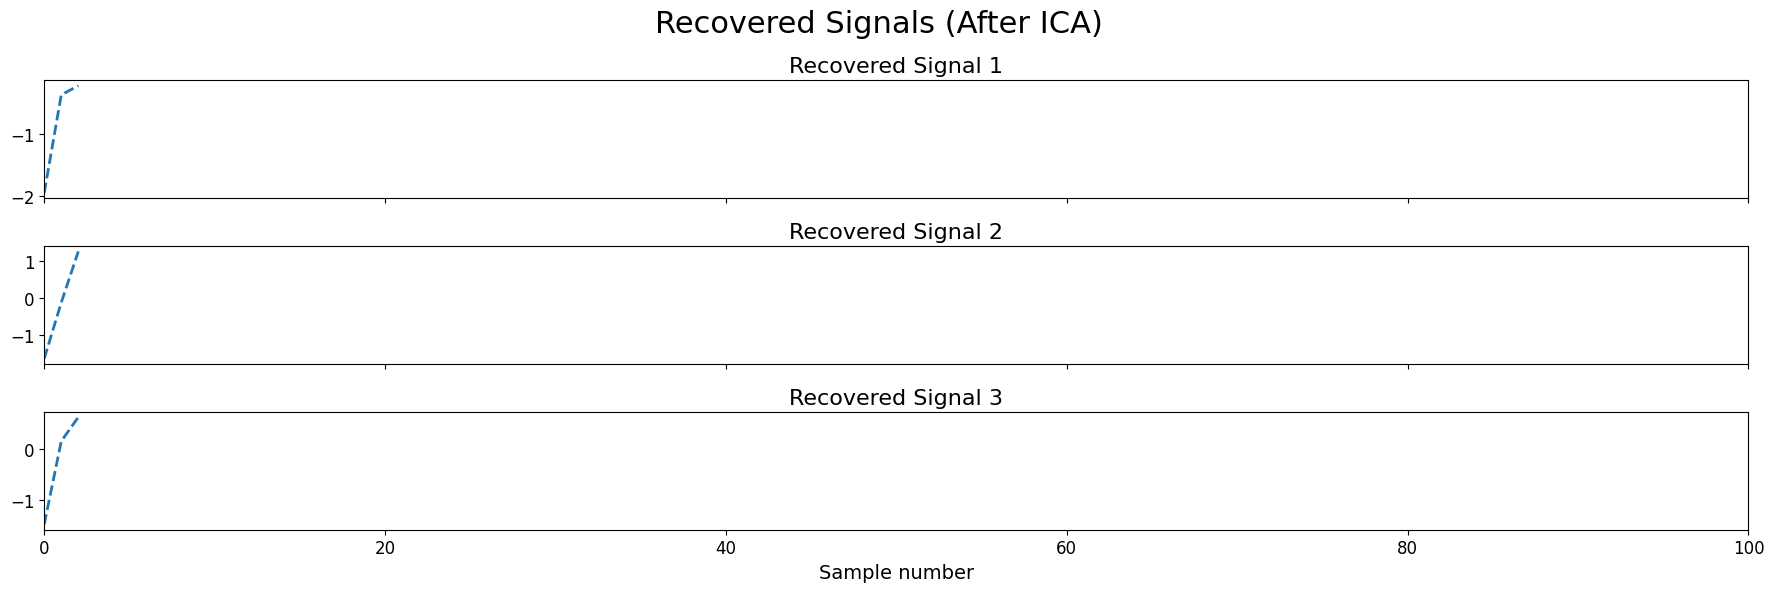

In [35]:
# Plot original source signals (ground truth)
fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot(S, lw=5)  # All sources combined in one plot
ax.tick_params(labelsize=12)
ax.set_xticks([])
ax.set_yticks([-1, 1])
ax.set_title('Source signals', fontsize=25)
ax.set_xlim(0, 100)  # Zoom into first 100 samples

# Plot ICA-recovered signals (estimated independent components) separately
fig, axes = plt.subplots(3, 1, figsize=(18, 6), sharex=True)

for i in range(3):
    axes[i].plot(unMixed[i], '--', lw=2)  # Dashed line for recovered signal i
    axes[i].set_title(f'Recovered Signal {i+1}', fontsize=16)
    axes[i].tick_params(labelsize=12)
    axes[i].set_xlim(0, 100)
    if i == 2:
        axes[i].set_xlabel('Sample number', fontsize=14)

fig.suptitle('Recovered Signals (After ICA)', fontsize=22)
plt.tight_layout()
plt.show()


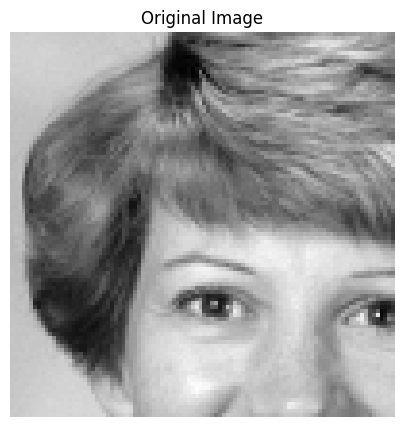

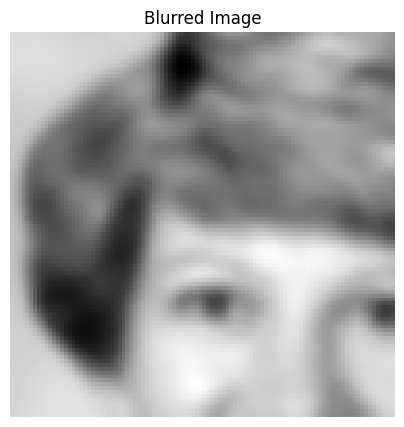

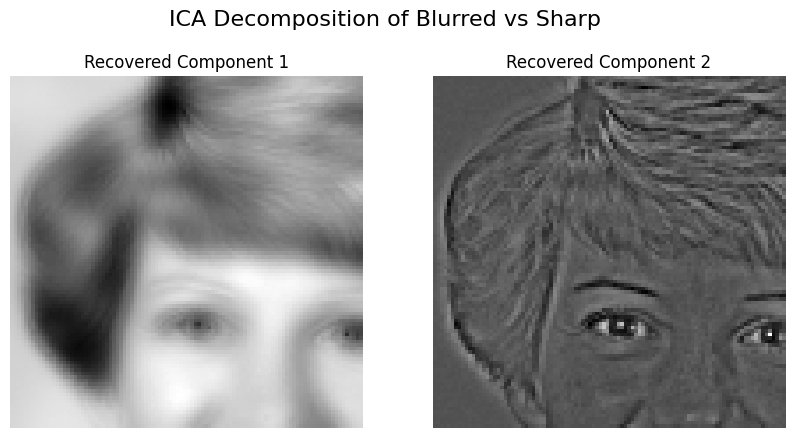

In [36]:
# Stage 0: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from skimage import data, color, img_as_float
from skimage.filters import gaussian

# Stage 1: Load and preprocess the image
image = img_as_float(color.rgb2gray(data.astronaut()))  # Convert to grayscale float
image = image[30:130, 150:250]  # Crop for faster processing (100x100)

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Stage 2: Simulate blur (a simple Gaussian blur)
blurred = gaussian(image, sigma=2)

plt.figure(figsize=(5, 5))
plt.imshow(blurred, cmap='gray')
plt.title("Blurred Image")
plt.axis('off')
plt.show()

# Stage 3: Create artificial mixtures (as if blurred and sharp details are mixed)
# We will treat rows of the image as signals
X = np.stack([
    image.reshape(-1),       # Sharp image vector
    blurred.reshape(-1)      # Blurred image vector
], axis=0)  # Shape: (2, num_pixels)

# Stage 4: Apply ICA to recover independent components
ica = FastICA(n_components=2, random_state=0)
S_ = ica.fit_transform(X.T)      # Separate sources (shape: [num_pixels, 2])
A_ = ica.mixing_                 # Estimated mixing matrix
unmixed_images = S_.T.reshape(2, *image.shape)  # Reshape back to image format

# Stage 5: Visualize ICA recovered components
plt.figure(figsize=(10, 5))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(unmixed_images[i], cmap='gray')
    plt.title(f"Recovered Component {i+1}")
    plt.axis('off')
plt.suptitle("ICA Decomposition of Blurred vs Sharp", fontsize=16)
plt.show()
